# Filtros de Respuesta al Impulso Finita (FIR)
## 1. Respuesta al impulso del filtro ideal

La respuesta en frecuencia de un filtro pasa bajas ideal se define como

 $$ H(\omega) = \left\{\begin{matrix}
     A &:& -\omega_c<x<\omega_c\\
     0&:& \mbox{otro caso}
  \end{matrix} \right .$$

 Función de respuesta al impulso del filtro ideal es
 
 $$ h(t) = sinc(x) = \left\{\begin{matrix}
     \dfrac{A}{\pi t}sin(\omega_ct)&:& t\neq0 \\
     2\omega_c&:& t=0
  \end{matrix} \right .$$

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [2]:
# Definicion de funcion para graficar respuesta en frecuencia del filtro
def freqz_plot(b,a,sr):
    w, h = signal.freqz(b,a)
    h[h==0] = 1E-5
    
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

In [3]:
def sinc(A, wc, t, sr):
    s = np.ones(t.shape)
    s[t!=0.] = A*np.sin( wc*t[t!=0] )/( np.pi*t[t!=0] )
    s[t==0.] = A*wc/(np.pi)
    
    return s

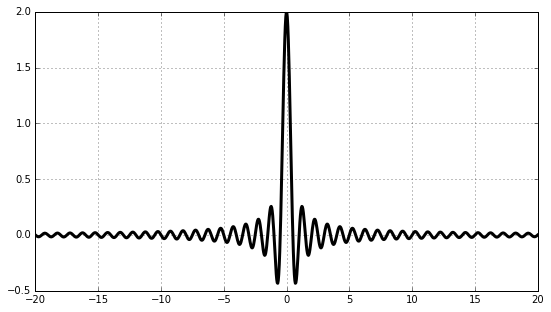

In [24]:
t   = np.linspace(-20,20,1000)
A   = 1.
wc  = 1*(2*np.pi)
sr  = 100
htn = sinc(A,wc,t,2*np.pi*sr)

plt.figure(figsize=(9,5))
plt.plot(t,htn,'k',linewidth=3)
plt.grid(True)
plt.show()

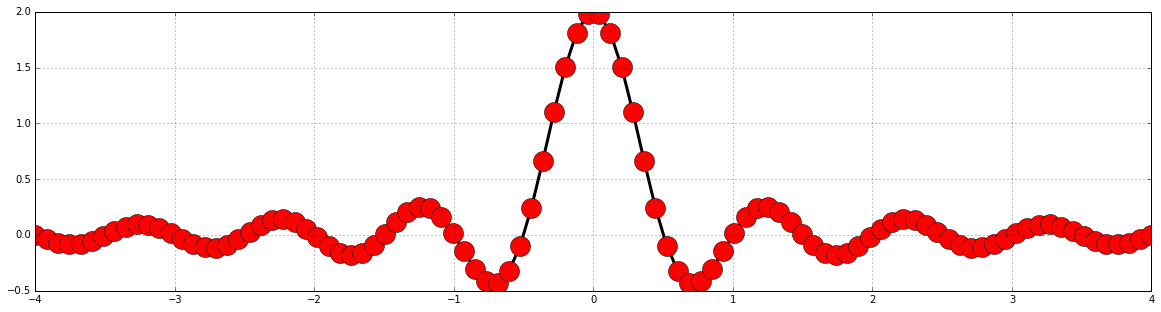

In [25]:
sr = 2.*(2*np.pi)
a  = 4

t = np.linspace(-a,a,int(2*a*sr) )
htn = sinc(1,wc,t,2*np.pi*sr)

plt.figure(figsize=(20,5))
plt.plot(t,htn,'k' ,linewidth=3)
plt.plot(t,htn,'or',linewidth=3,markersize=20)
plt.grid(True)
plt.show()


In [38]:
sr = 180.*2*np.pi
fc = 90.
wc = fc*2*np.pi

N  = 100
M  = N+1
m  = ( np.arange(M) - M/2 )/sr
#print '%5.4f,\n%5.4f,\n%s,\n%s'%(wc,sr,m,m/sr)
htn = sinc(1,wc,m,sr)

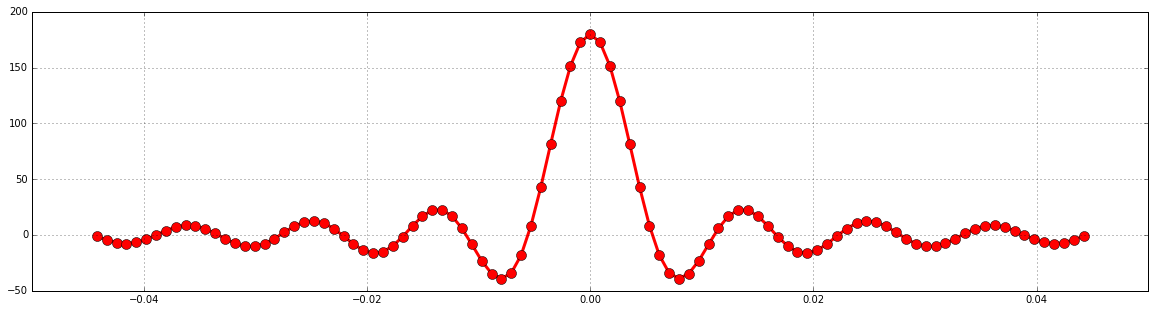

In [39]:
plt.figure(figsize=(20,5))
plt.plot(m,htn,'-or',linewidth=3,markersize=10)
plt.grid(True)
plt.show()

[-4.         -3.99911563 -3.99823126 ...,  3.99823126  3.99911563  4.        ]


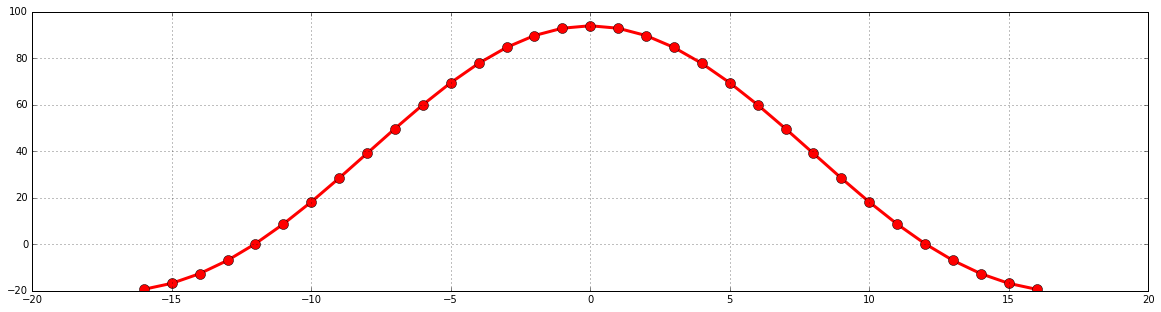

In [56]:
sr = 180.*2*np.pi

fc = 47
wc = fc*2*np.pi
N  = 32
M  = N+1

m   = np.arange(M) - M/2
t   = np.linspace(-a,a,int(2*a*sr) )
htn = sinc(1,wc,m/sr,sr)

print t
plt.figure(figsize=(20,5))
#plt.plot(t,htn,'k' ,linewidth=3)
plt.plot(m,htn,'-or',linewidth=3,markersize=10)
plt.grid(True)
plt.show()


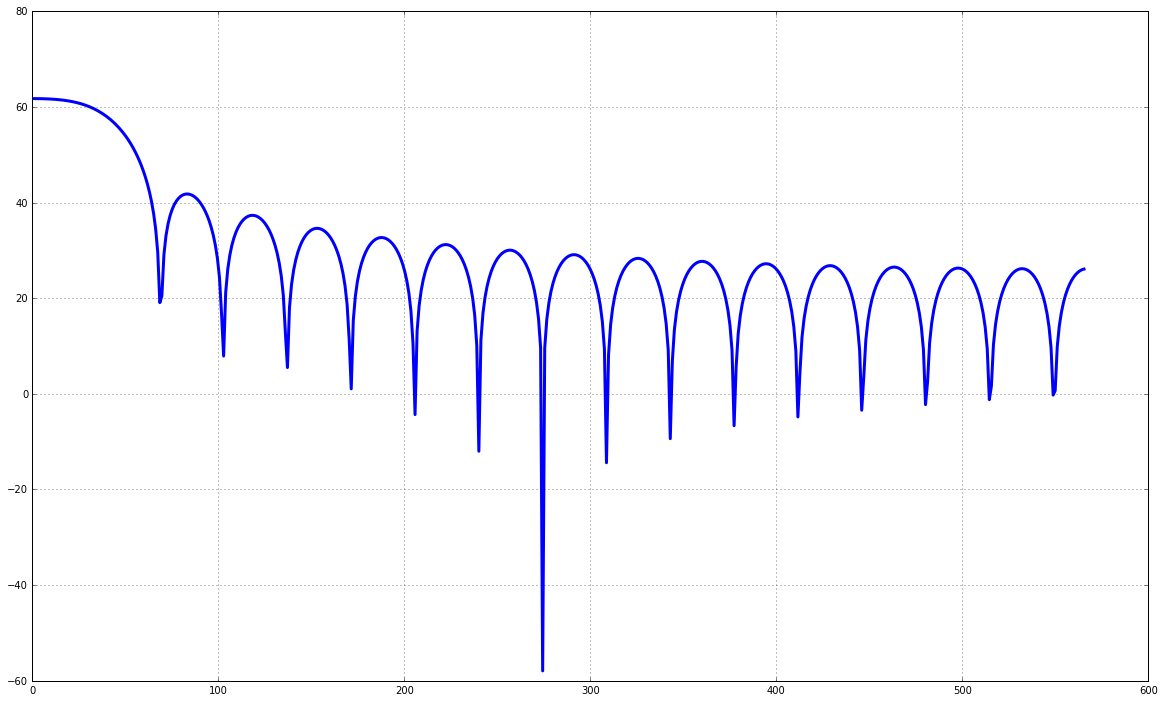

In [57]:
w, W, H, = freqz_plot(htn,[1.],sr)

plt.figure(figsize=(20,12))
plt.plot(w,H,'b',linewidth=3)
plt.grid(True)
plt.show()

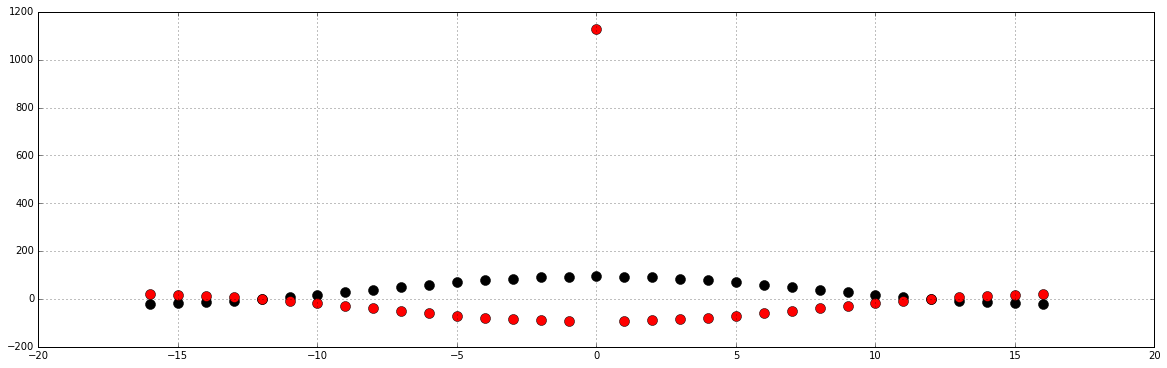

In [68]:
htna         =  htn.copy()
htna[ m!=0 ] = -htn[ m!=0 ]
htna[ m==0 ] = 12*htn[ m==0 ]


plt.figure(figsize=(20,6))
#plt.plot(t,htn,'k' ,linewidth=3)
plt.plot(m,htn ,'ok',linewidth=3,markersize=10)
plt.plot(m,htna,'or',linewidth=3,markersize=10)
plt.grid(True)
plt.show()

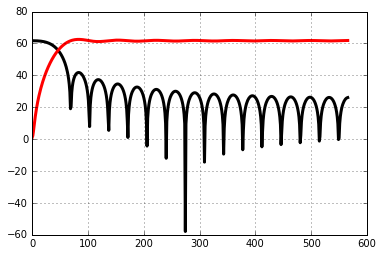

In [69]:
w, W, H, = freqz_plot(htn,[1.],sr)
plt.plot(w,H,'k',linewidth=3)

w, W, H, = freqz_plot(htna,[1.],sr)
plt.plot(w,H,'r',linewidth=3)

plt.grid(True)
plt.show()

In [70]:
def fir(fc, N, sr):
    ft = fc/float(sr)
    M  = N + 1
    s  = np.ones(M)
    m  = np.arange(M) - M/2
    
    s[m!=0] = np.sin( ft*m[m!=0] )/( np.pi*m[m!=0] )
    s[m==0] = 2*ft
    
    sa       = -s.copy()
    sa[m==0] = 1-2*ft
    print m*ft
    return s,sa,m

In [82]:
sr        = 120
lp, hp, m = fir(41, 30, 120)
print lp
print hp

[-5.125      -4.78333333 -4.44166667 -4.1        -3.75833333 -3.41666667
 -3.075      -2.73333333 -2.39166667 -2.05       -1.70833333 -1.36666667
 -1.025      -0.68333333 -0.34166667  0.          0.34166667  0.68333333
  1.025       1.36666667  1.70833333  2.05        2.39166667  2.73333333
  3.075       3.41666667  3.75833333  4.1         4.44166667  4.78333333
  5.125     ]
[-0.01943976 -0.02267923 -0.02359357 -0.02170547 -0.01673672 -0.00864587
  0.00235349  0.01579662  0.03099359  0.04707604  0.0630608   0.07792527
  0.09068799  0.10048748  0.10665224  0.68333333  0.10665224  0.10048748
  0.09068799  0.07792527  0.0630608   0.04707604  0.03099359  0.01579662
  0.00235349 -0.00864587 -0.01673672 -0.02170547 -0.02359357 -0.02267923
 -0.01943976]
[ 0.01943976  0.02267923  0.02359357  0.02170547  0.01673672  0.00864587
 -0.00235349 -0.01579662 -0.03099359 -0.04707604 -0.0630608  -0.07792527
 -0.09068799 -0.10048748 -0.10665224  0.31666667 -0.10665224 -0.10048748
 -0.09068799 -0.0779252

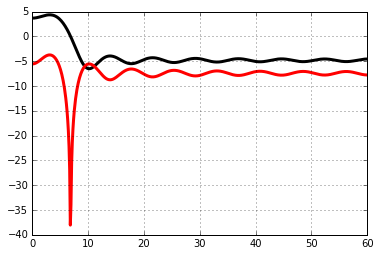

In [83]:
w, W, H, = freqz_plot(lp,[1.],sr)
plt.plot(w,H,'k',linewidth=3)

w, W, H, = freqz_plot(hp,[1.],sr)
plt.plot(w,H,'r',linewidth=3)

plt.grid(True)
plt.show()